Sample DataFrame with missing values:
     A         B    C    D
0  1.0       cat  1.1  NaN
1  2.0       dog  NaN  NaN
2  NaN    rabbit  3.5  3.2
3  4.0       NaN  4.0  4.1
4  5.0  elephant  NaN  5.0

First few rows of the dataset:
     A         B    C    D
0  1.0       cat  1.1  NaN
1  2.0       dog  NaN  NaN
2  NaN    rabbit  3.5  3.2
3  4.0       NaN  4.0  4.1
4  5.0  elephant  NaN  5.0

Missing Data Count:
A    1
B    1
C    2
D    2
dtype: int64

Missing Data Percentage:
A    20.0
B    20.0
C    40.0
D    40.0
dtype: float64


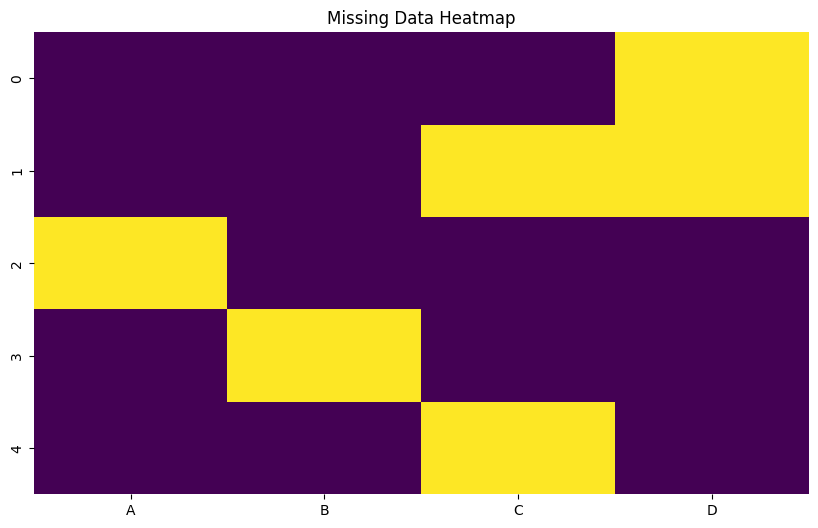


Original DataFrame shape: (5, 4)
DataFrame shape after dropping rows with missing values: (0, 4)
DataFrame shape after dropping columns with missing values: (5, 0)


TypeError: can only concatenate str (not "int") to str

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Step 1: Create and Save Sample CSV File with Missing Data

# Create a sample DataFrame with missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': ['cat', 'dog', 'rabbit', np.nan, 'elephant'],
    'C': [1.1, np.nan, 3.5, 4.0, np.nan],
    'D': [np.nan, np.nan, 3.2, 4.1, 5.0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file named 'samp_data.csv'
df.to_csv('samp_data.csv', index=False)

# Display the DataFrame
print("Sample DataFrame with missing values:")
print(df)

# Step 2: Load the Data
# Load the dataset (this is just to simulate loading your data later)
df = pd.read_csv('samp_data.csv')

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 3: Detect Missing Data

# Check for missing values in each column
missing_data = df.isnull().sum()

# Show the percentage of missing values in each column
missing_percentage = (df.isnull().mean()) * 100

# Print the missing data summary
print("\nMissing Data Count:")
print(missing_data)

print("\nMissing Data Percentage:")
print(missing_percentage)

# Visualize missing data with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Step 4: Handle Missing Data by Dropping

# 1. Drop Rows with Any Missing Values
df_dropped = df.dropna()

# 2. Drop Columns with Any Missing Values
df_dropped_columns = df.dropna(axis=1)

# Print new shapes after dropping
print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame shape after dropping rows with missing values: {df_dropped.shape}")
print(f"DataFrame shape after dropping columns with missing values: {df_dropped_columns.shape}")

# Step 5: Handle Missing Data by Imputation

# 1. Fill Missing Values with a Constant (e.g., 0)
df_filled_constant = df.fillna(0)

# 2. Fill Missing Values with the Mean of Each Column
df_filled_mean = df.fillna(df.mean())

# 3. Fill Missing Values with the Median of Each Column
df_filled_median = df.fillna(df.median())

# 4. Fill Missing Values with the Mode (Most Frequent Value) of Each Column
df_filled_mode = df.fillna(df.mode().iloc[0])

# 5. Using SimpleImputer for Imputation with Mean Strategy
imputer = SimpleImputer(strategy='mean')

# Apply imputer to the dataset (works on numeric columns by default)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Print a sample of the imputed dataset
print("\nSample of the imputed dataset (with mean imputation):")
print(df_imputed.head())

# Step 6: Optionally Save the Processed Data

# Save the cleaned datasets to new CSV files
df_dropped.to_csv('cleaned_data_dropped.csv', index=False)
df_filled_constant.to_csv('cleaned_data_filled_constant.csv', index=False)
df_filled_mean.to_csv('cleaned_data_filled_mean.csv', index=False)
df_imputed.to_csv('cleaned_data_imputed.csv', index=False)

print("\nProcessed data has been saved to the following CSV files:")
print("- cleaned_data_dropped.csv")
print("- cleaned_data_filled_constant.csv")
print("- cleaned_data_filled_mean.csv")
print("- cleaned_data_imputed.csv")
